In [1]:
from data_loaders import load_data_labels_based_on_dataset
from share import datasets_basic_infos, ROOT_VOTING_SYSTEM_PATH
import numpy as np
import matplotlib.pyplot as plt
from data_utils import train_test_val_split
import mne

dataset_name = 'ic_bci_2020'  # Only two things I should be able to change

# Folders and paths
dataset_foldername = dataset_name + '_dataset'
computer_root_path = ROOT_VOTING_SYSTEM_PATH + "/Datasets/"
data_path = computer_root_path + dataset_foldername
dataset_info = datasets_basic_infos[dataset_name]

epochs_list = []
for subject_id in range(1, dataset_info['subjects']+1):
    individual_epochs, data, labels = load_data_labels_based_on_dataset(dataset_info, subject_id, data_path)
    epochs_list.append(individual_epochs)
    

epochs = mne.concatenate_epochs(epochs_list)

data_train, data_test, _, labels_train, labels_test, _ = train_test_val_split(
        dataX=data, dataY=labels, valid_flag=False)

Not setting metadata
300 matching events found
Setting baseline interval to [0.0, 3.1015625] s
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
300 matching events found
Setting baseline interval to [0.0, 3.1015625] s
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
300 matching events found
Setting baseline interval to [0.0, 3.1015625] s
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
300 matching events found
Setting baseline interval to [0.0, 3.1015625] s
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
300 matching events found
Setting baseline interval to [0.0, 3.1015625] s
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
300 matching events found
Setting baseline interval to [0.0, 3.1015625] s
Applying baseline correction (mode: mean)
0 projection items activated
Not 

In [2]:
from collections import defaultdict

def indexes(l, chosen_key):
    _indices = defaultdict(list)
    for index, item in enumerate(l):
        _indices[item].append(index)

    for key, value in _indices.items():
        if key == chosen_key:
            return value
#indexes(labels, 0)

I think there is something there: 1, 3, 8, 10, 11, 13, 15, 18, 21, 23

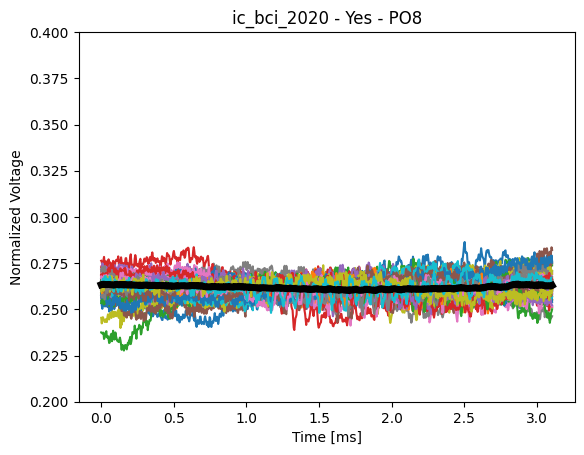

In [4]:
for channel in range(len(dataset_info["channels_names"])):
    for word_index in range(len(dataset_info["target_names"])):
        plt.clf()
        samples_to_time = np.linspace(0, dataset_info["samples"]/dataset_info["sample_rate"], num=dataset_info["samples"])
        for i_index in indexes(labels, word_index):
            plt.plot(samples_to_time, data[i_index,channel,:])
        plt.plot(samples_to_time, np.mean(data[:,channel,:], axis=0), linewidth=5, color='k')
        plt.title(f'{dataset_name} - {dataset_info["target_names"][word_index]} - {dataset_info["channels_names"][channel]}')
        plt.xlabel('Time [ms]')
        plt.ylabel('Normalized Voltage')
        plt.ylim(0.2, 0.4)
        plt.savefig(f'{ROOT_VOTING_SYSTEM_PATH}/Results/{dataset_name}/ERP/ERP_{dataset_name}_{dataset_info["target_names"][word_index]}_{dataset_info["channels_names"][channel]}.png')

# Do the XDAWN DENOISING HERE AND SEE THE SIGNALS
https://mne.tools/stable/auto_examples/preprocessing/xdawn_denoising.html#sphx-glr-auto-examples-preprocessing-xdawn-denoising-py